Data analysis of medicines data

Install the needed packages on the first usage.

In [1]:
! pip install openpyxl
! pip install seaborn

load the needed libraries

In [ ]:
import pandas as pd
import seaborn as sns

load data

In [ ]:
raw_data = pd.read_excel('../data/fr_medicines_output_medicines_en.xlsx')

In [ ]:
raw_data.shape

So there are 39 filled data colums and thousands of medicine rows.

In [ ]:
raw_data.describe()

Odd. The column names are mostly 'unnamed'.

In [ ]:
raw_data.head(n=10)

Ahaa. The data starts at row 7 with the column names, followed by the actual data.
First save the column names properly. Then let us get rid of the first 7 rows.

In [ ]:
raw_data.loc[7] #gets the row containing the column names
raw_data.columns = raw_data.loc[7] #sets the column names

In [ ]:
data = raw_data.drop(raw_data.index[range(8)]) #drops the rows until row 8

In [ ]:
data = data.reset_index(drop=True) #resets the index which was inherited from the import and drops the old index column!

In [ ]:
data.head()

There are some linebreaks '\n' in the column names. Replace them with white space to avoid complications.

In [ ]:
data.columns

In [ ]:
data.columns.str.replace('\n',' ')

In [ ]:
data.columns = data.columns.str.replace('\n',' ')

Now have a look at the data classes in the columns and assign appropriate ones.

In [ ]:
data.dtypes #'object' equals a normal string in pandas

Make a list for each dtype to assign.

In [ ]:
categorical = ['Category', 'Medicine status', 'Opinion status', 'Patient safety', 'Pharmacotherapeutic group (human)', 'Pharmacotherapeutic group (veterinary)', 'Accelerated assessment', 'Additional monitoring', 'Advanced therapy', 'Biosimilar', 'Conditional approval', 'Exceptional circumstances', 'Generic or hybrid', 'Orphan medicine', 'PRIME: priority medicine']
date = ['European Commission decision date', 'Start of rolling review date', 'Start of evaluation date', 'Opinion adopted date', 'Withdrawal of application date', 'Marketing authorisation date', 'Refusal of marketing authorisation date', 'Withdrawal / expiry / revocation / lapse of marketing authorisation date', 'Suspension of marketing authorisation date', 'First published date', 'Last updated date']
numerical = ['Revision number']

In [ ]:
for col in data.columns:
    if col in categorical:
        data[col] = data[col].astype('category')

In [29]:
data['European Commission decision date']

0      2024-07-24
1      2024-06-10
2      2024-08-09
3      2024-07-26
4      2024-07-25
          ...    
2428   2001-02-19
2429   2001-01-22
2430   1999-07-30
2431   2000-07-27
2432   2000-07-05
Name: European Commission decision date, Length: 2433, dtype: datetime64[ns]

In [30]:
pd.to_datetime(data['European Commission decision date'], format="%d/%m/%Y")

0      2024-07-24
1      2024-06-10
2      2024-08-09
3      2024-07-26
4      2024-07-25
          ...    
2428   2001-02-19
2429   2001-01-22
2430   1999-07-30
2431   2000-07-27
2432   2000-07-05
Name: European Commission decision date, Length: 2433, dtype: datetime64[ns]

In [31]:
for col in data.columns:
    if col in date:
        data[col] = pd.to_datetime(data[col], format="%d/%m/%Y")

In [32]:
for col in data.columns:
    if col in numerical:
        data[col] = data[col].astype('float64')

In [33]:
data.dtypes #check if dtypes were assigned successfully

7
Category                                                                          category
Name of medicine                                                                    object
EMA product number                                                                  object
Medicine status                                                                   category
Opinion status                                                                    category
Latest procedure affecting product information                                      object
International non-proprietary name (INN) / common name                              object
Active substance                                                                    object
Therapeutic area (MeSH)                                                             object
Species (veterinary)                                                                object
Patient safety                                                                    catego

# Do some simple plots on the cleaned data.

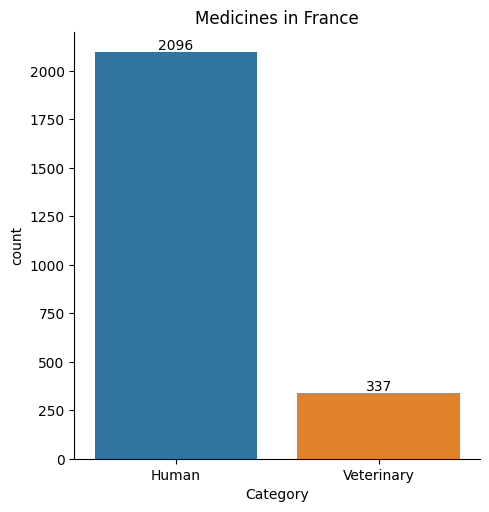

In [34]:
ax = sns.catplot(data=data,
           x='Category',
           kind='count',
           hue='Category')
ax.set(title='Medicines in France')

##Add data values to the bar plot
# extract the matplotlib axes_subplot objects from the FacetGrid
lb = ax.facet_axis(0, 0)
# iterate through the axes containers
for c in lb.containers:
    labels = [int(v.get_height()) for v in c]
    lb.bar_label(c, labels=labels, label_type='edge')

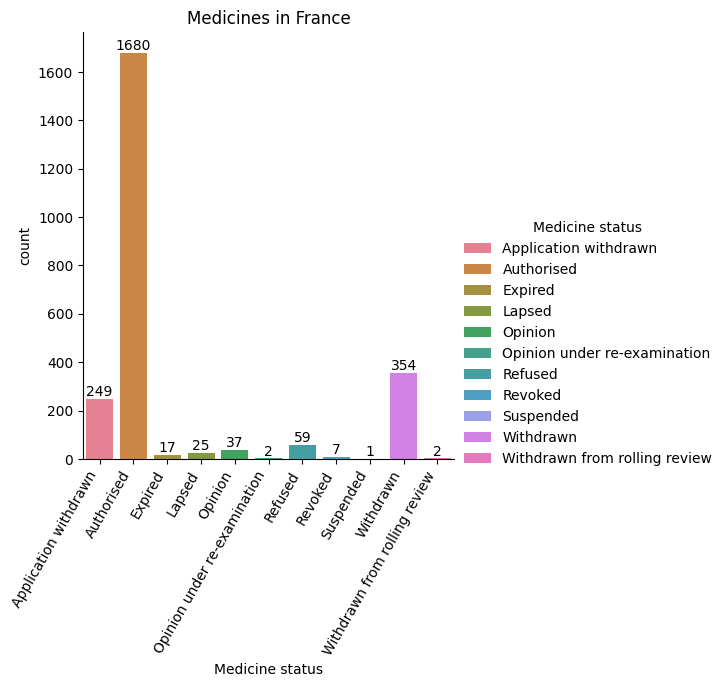

In [35]:
ax = sns.catplot(data=data,
           x='Medicine status',
           kind='count',
           hue='Medicine status',
           legend='full')
ax.set(title='Medicines in France')
ax.set_xticklabels(rotation=60, ha='right')

##Add data values to the bar plot
# extract the matplotlib axes_subplot objects from the FacetGrid
lb = ax.facet_axis(0, 0)
# iterate through the axes containers
for c in lb.containers:
    labels = [int(v.get_height()) for v in c]
    lb.bar_label(c, labels=labels, label_type='edge')

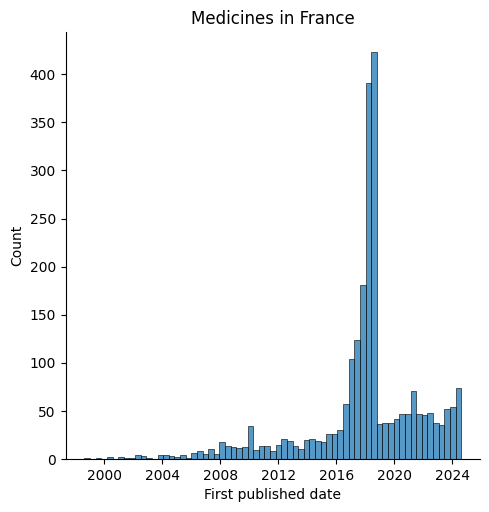

In [36]:
ax = sns.displot(data=data,
           x='First published date',
           kind='hist',
           fill=True)#,
#           bw_adjust=.2)
ax.set(title='Medicines in France')


## Make a subset of the Influenza data

In [49]:
IV = data[data['Therapeutic area (MeSH)'].str.contains('Influenza').astype('boolean')]

Harmonize owner names

In [38]:
Seqirus = IV['Marketing authorisation developer / applicant / holder'].str.contains('Seqirus').astype('boolean')
Glaxo = IV['Marketing authorisation developer / applicant / holder'].str.contains('Glaxo').astype('boolean')
Sanofi = IV['Marketing authorisation developer / applicant / holder'].str.contains('Sanofi').astype('boolean')

In [56]:
IV.loc[Seqirus, 'Marketing authorisation developer / applicant / holder'] = 'Seqirus'
IV.loc[Glaxo, 'Marketing authorisation developer / applicant / holder'] = 'GlaxoSmithKline'
IV.loc[Sanofi, 'Marketing authorisation developer / applicant / holder'] = 'Sanofi Pasteur'

define order by owner occurence

In [81]:
avtal = IV.groupby('Marketing authorisation developer / applicant / holder').count()['Category'] #occurence

Marketing authorisation developer / applicant / holder
Actavis Group PTC ehf                          1
AstraZeneca AB                                 3
Biocryst                                       1
GlaxoSmithKline                                8
MedImmune LLC                                  1
Nanotherapeutics Bohumil, s.r.o.               1
Novartis Vaccines and Diagnostics S.r.l.       3
Ology Bioservices Ireland LTD                  1
Resilience Biomanufacturing Ireland Limited    1
Roche Registration GmbH                        2
Sanofi Pasteur                                 5
Seqirus                                        8
Name: Category, dtype: int64

In [96]:
newOrder = avtal.sort_values(ascending=False).index

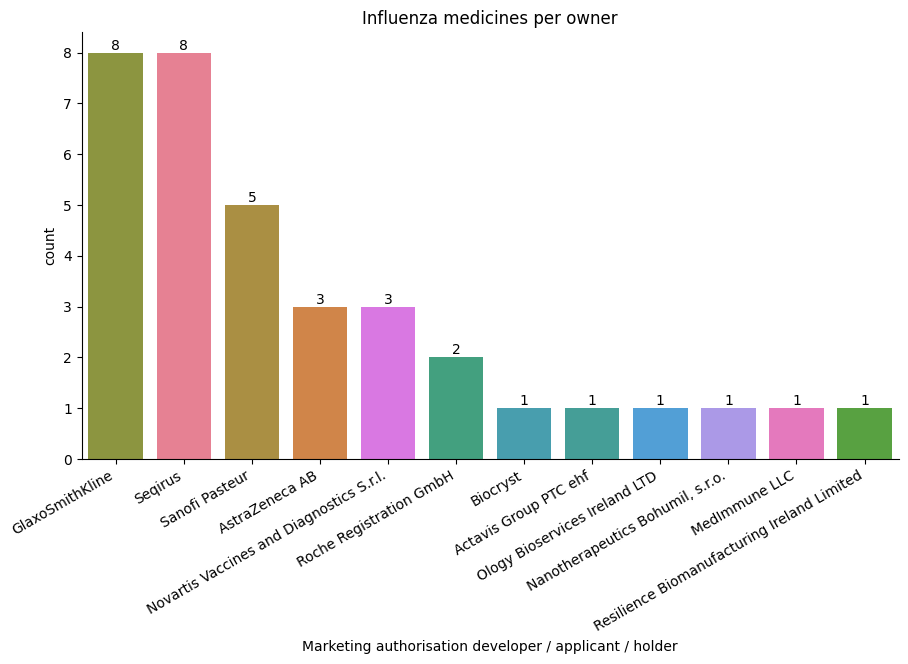

In [117]:
#important: this creates a FacetGrid object, not a regular plot. Means I con not use regular plot functions, only FacetGrid functions.
ax = sns.catplot(data=IV,
                x='Marketing authorisation developer / applicant / holder',
                kind='count',
                hue='Marketing authorisation developer / applicant / holder',
                aspect=2/1,
                order=newOrder)
ax.set(title='Influenza medicines per owner')
ax.set_xticklabels(rotation=30, ha='right')


##Add data values to the bar plot
# extract the matplotlib axes_subplot objects from the FacetGrid
lb = ax.facet_axis(0, 0)
# iterate through the axes containers
for c in lb.containers:
    labels = [int(v.get_height()) for v in c]
    lb.bar_label(c, labels=labels, label_type='edge')